In [1]:
import gymnasium as gym
from gymnasium.wrappers.jax_to_numpy import JaxToNumpy
from gymnasium.wrappers.vector import JaxToNumpy as VJaxToNumpy
from solarcarsim.simv1 import SolarRaceV1
from gymnasium.utils.env_checker import check_env as gym_check_env
from stable_baselines3 import TD3, PPO
from stable_baselines3.common.env_checker import check_env
import matplotlib.pyplot as plt
import jax.numpy as jnp
env = SolarRaceV1()
wrapped_env = JaxToNumpy(env)

In [2]:
gym_check_env(wrapped_env)

/home/saji/Documents/Code/solarcarsim/.venv/lib/python3.12/site-packages/gymnasium/utils/env_checker.py:384: UserWarning: WARN: The environment (<JaxToNumpy<SolarRaceV1 instance>>) is different from the unwrapped version (<SolarRaceV1 instance>). This could effect the environment checker as the environment most likely has a wrapper applied to it. We recommend using the raw environment for `check_env` using `env.unwrapped`.
  logger.warn(
/home/saji/Documents/Code/solarcarsim/.venv/lib/python3.12/site-packages/gymnasium/utils/env_checker.py:434: UserWarning: WARN: Not able to test alternative render modes due to the environment not having a spec. Try instantiating the environment through `gymnasium.make`
  logger.warn(


In [ ]:
# import a model and try it out!
model = PPO("MultiInputPolicy", wrapped_env, verbose=1)
model.learn(total_timesteps=1_000_000)


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 601      |
|    ep_rew_mean     | -293     |
| time/              |          |
|    fps             | 181      |
|    iterations      | 1        |
|    time_elapsed    | 11       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 601          |
|    ep_rew_mean          | -273         |
| time/                   |              |
|    fps                  | 174          |
|    iterations           | 2            |
|    time_elapsed         | 23           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0054363105 |
|    clip_fraction        | 0.036        |
|    clip_range           | 0.2          |
|    e

KeyboardInterrupt: 

: 

In [4]:
vec_env = model.get_env()
obs = vec_env.reset()
actions = []
obs_list = []
rewards = []
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    actions.append(action)
    obs, reward, done, info = vec_env.step(action)
    obs_list.append(obs)
    rewards.append(reward)

    
    # VecEnv resets automatically
    if done:
        break
    #   obs = vec_env.reset()

position = jnp.array([x['position'] for x in obs_list]).flatten()
energy = jnp.array([x['energy'] for x in obs_list]).flatten()
actions = jnp.array(actions).flatten()

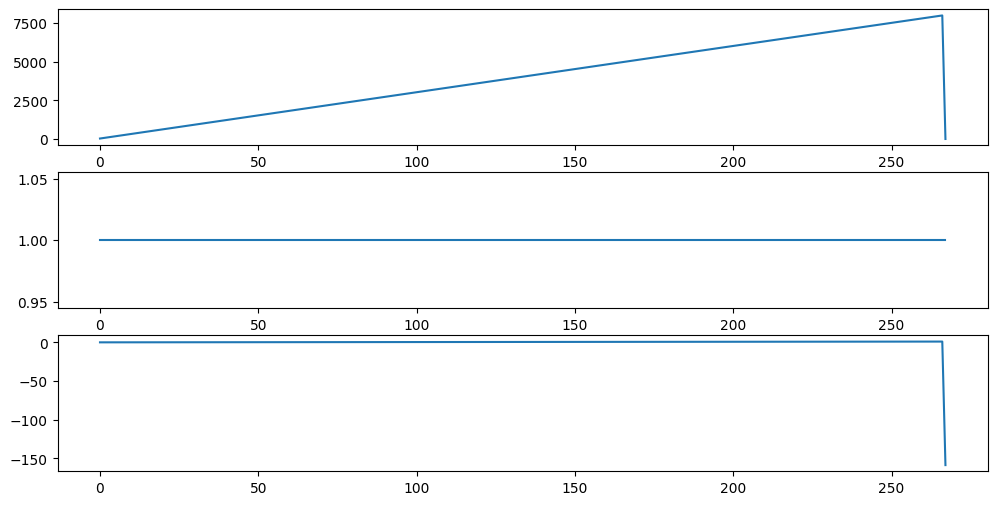

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,6))
ax1.plot(position, label="position")
ax2.plot(actions, label="energy")
ax3.plot(rewards)
# plt.legend()

In [6]:
actions

Array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.